In [1]:
import os
import pickle
import numpy as np
from FFNN_class_depl import *
from data_work_depl import *
from NN_call import *
import matplotlib.pyplot as plt

In [2]:
# 0 - Define path to relevant files
path_data = r'C:\Users\vbalmer\Documents\GitHub\ShellSim\05_Deploying\Test'
name = 'data_240814_1711_case4\\new_data'
path_data_name = os.path.join(path_data,name)

with open(os.path.join(path_data_name, 'mat_data_np_TrainEvalTest.pkl'),'rb') as handle:
		mat_data_np_TrainEvalTest = pickle.load(handle)

In [3]:
# 1a - Initialisation with eps_h from training set

# eps_h = mat_data_np_TrainEvalTest['X_train'][0:10, 0:8]
# t = mat_data_np_TrainEvalTest['X_train'][0:10, 8]
# random_sig_h = np.zeros((1,8))										# this value is just put as a placeholder, not used.
# sig_h = mat_data_np_TrainEvalTest['y_train'][0:10, 0:8]
# D_sim = mat_data_np_TrainEvalTest['X_train'][0:10,9:].reshape((10,8,8))

In [4]:
# 1b - Initialisation with eps_h from test set

eps_h = mat_data_np_TrainEvalTest['X_test'][:, 0:8]
t = mat_data_np_TrainEvalTest['X_test'][:, 8]
# random_sig_h = np.zeros((1,8))										# this value is just put as a placeholder, not used.
sig_h = mat_data_np_TrainEvalTest['y_test'][:, 0:8]
D_sim = mat_data_np_TrainEvalTest['y_test'][:,8:].reshape((eps_h.shape[0],8,8))

In [5]:
def checking_plt(prediction, nr, title):
    fig, ax = plt.subplots(ncols = 3, figsize=(10,5))
    for i in range(3):
        if i==0 or i==1:
            if len(prediction.shape) > 2:
                pos = ax[i].matshow(prediction[nr, 0, 0, i*3:(i+1)*3,i*3:(i+1)*3])
            else:
                pos = ax[i].matshow(prediction[nr,i*3:(i+1)*3].reshape((1,3)))
        else:
            if len(prediction.shape) > 2:
                pos = ax[i].matshow(prediction[nr,0,0,6:8,6:8])
            else: 
                pos = ax[i].matshow(prediction[nr,6:8].reshape((1,2)))
        fig.colorbar(pos, ax=ax[i])
        ax[i].set_title(title)
    fig.show()
    return

(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)
(1, 9)

C:\Users\vbalmer\AppData\Local\Temp\ipykernel_9300\1610067362.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


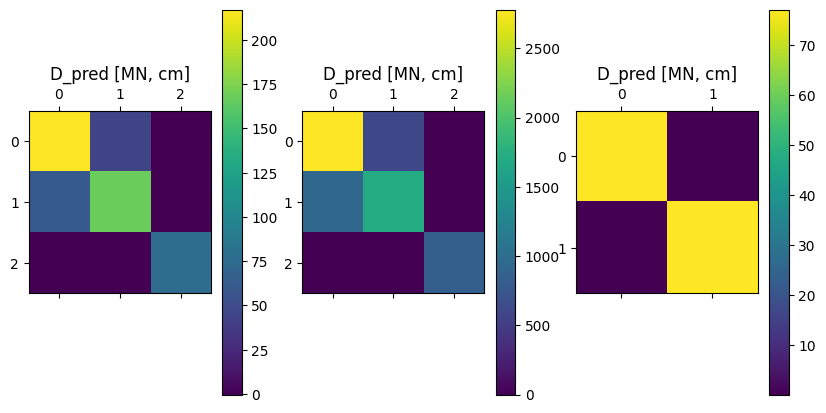

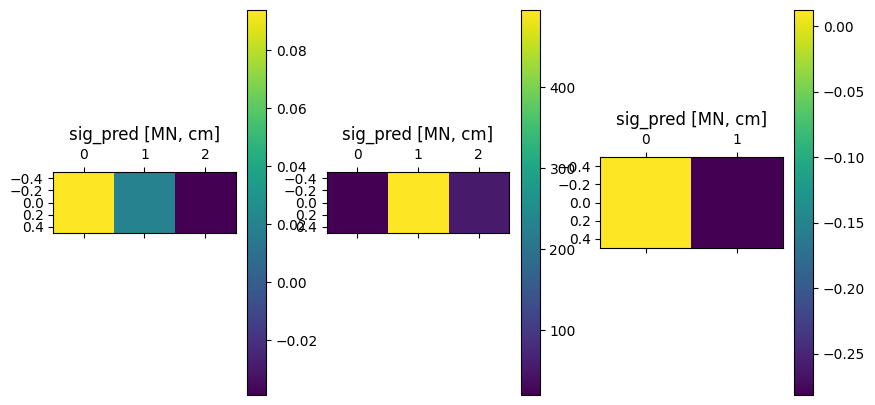

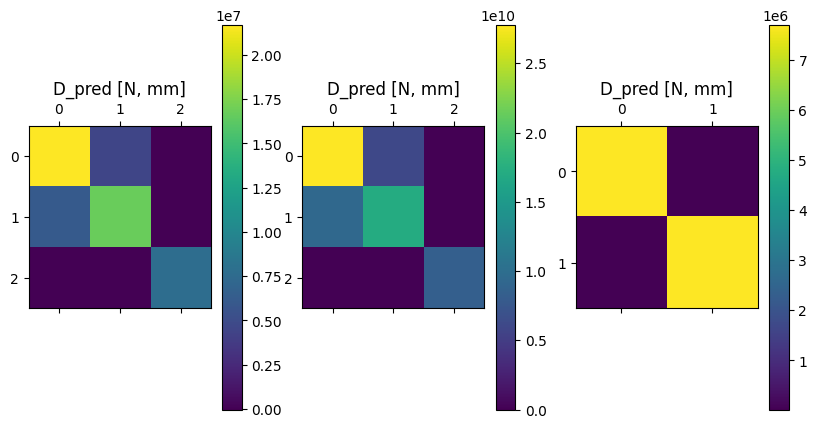

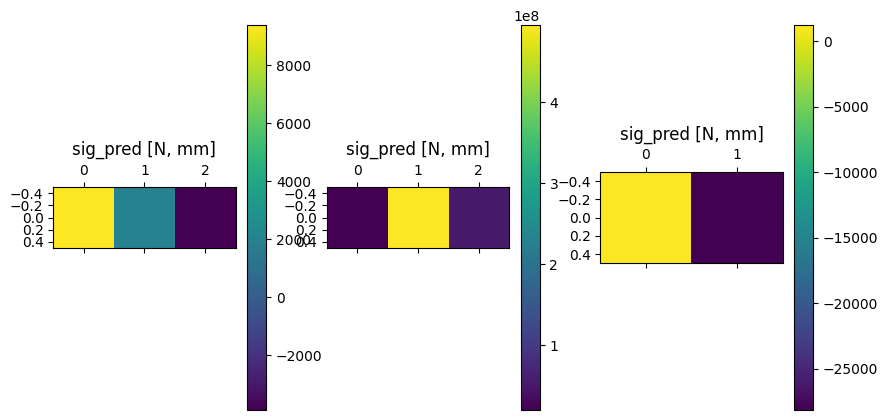

In [6]:
# 2 - Make a prediction

# a - predict in [MN, cm]
D_pred = np.zeros((eps_h.shape[0],1,1,8,8))
sig_h_pred = np.zeros((eps_h.shape[0],8))
for k in range(eps_h.shape[0]):
    input_j = np.concatenate((np.array([eps_h[k,:]]), [[t[k]]]), axis = 1)
    print(input_j.shape)
    mat_pred = predict_sig_D(input_j, path_data_name, 'test', 'direct')
    D_pred[k,0,0,:,:] = mat_pred['D_pred']
    sig_h_pred[k,:] = mat_pred['sig_h']

# Plot to check
checking_plt(D_pred,23,'D_pred [MN, cm]')
checking_plt(sig_h_pred,23,'sig_pred [MN, cm]')


# b - Change to simulation units [N, mm]
D_pred_un = np.zeros((eps_h.shape[0], 1, 1, 8,8))
sig_un = np.zeros((eps_h.shape[0],8))

for k in range(eps_h.shape[0]):
    D_pred_un[k,0,0,:,:] = D_pred[k,0,0,:,:]*10**(6)
    
    D_pred_un[k,0,0,0:3, 0:3] = D_pred_un[k,0,0,0:3, 0:3]*10**(-1)
    D_pred_un[k,0,0,6:8, 6:8] = D_pred_un[k,0,0,6:8, 6:8]*10**(-1) 
    D_pred_un[k,0,0,3:6, 3:6] = D_pred_un[k,0,0,3:6, 3:6]*10**(1)

    sig_un[k,:] = sig_h_pred[k,:]*10**(6)
    sig_un[k,0:3] = sig_un[k,0:3]*10**(-1)
    sig_un[k,6:8] = sig_un[k,6:8]*10**(-1)


checking_plt(D_pred_un,23,'D_pred [N, mm]')
checking_plt(sig_un,23,'sig_pred [N, mm]')

In [7]:
# 3 - Create graphs for plotting the learned NN function
# allows for intuition about derivative
# [yields the exact same solution as the one used in the testing part of 04_Training]

# this doesn't work because of module integration. But should yield same result as before in training.

# name1 = 'data_240814_1711_case4'
# path_data_name1 = os.path.join(path_data,name1)
# data_model = load_data_model(path_data_name1)

# inp_out_plt('eps_x', 'n_x', data_model, path_data_name1, path = None)     # for D_m_11
# inp_out_plt('eps_y', 'n_y', data_model, path_data_name1, path = None)     # for D_m_22
# inp_out_plt('chi_x', 'm_x', data_model, path_data_name1, path = None)     # for D_b_11
# inp_out_plt('gam_x', 'v_x', data_model, path_data_name1, path = None)     # for D_s_11
# inp_out_plt('chi_x', 'n_x', data_model, path_data_name1, path = None)     # for D_mb_11(1)

In [8]:
#########################################################

# THIS IS OLD CODE, PLEASE IGNORE
# Checks are carried out directly after training as well.

#########################################################

In [9]:
# Plot matrices in colorplot (not working)
# D_plt(D_pred[0,0,0,:,:], 'D_all', True)
# D_plt(D_coeff_j, 'D_b', True)
# D_plt(D_t, 'D_m', False)

In [10]:
# 4 - Check prediction of sigma with diagonal plot 
# [yields the exact same plot as the one used in the testing part of 04_Training]

# save_path_depl = r'C:\Users\vbalmer\Documents\GitHub\ShellSim\05_Deploying\Test\45°-plots'

# multiple_diagonal_plots(save_path_depl, sig_h, sig_h_pred, 'o')

In [11]:
# 5 - Analytical solution of stiffness matrix
# [yields the exact same solution as the one used in the testing part of 04_Training]

# D_analytical = np.zeros((eps_h.shape[0],8,8))
# sig_analytical = np.zeros((eps_h.shape[0], 8, 8))
# for i in range(eps_h.shape[0]):
#     D_analytical[i,:,:], sig_analytical[i,:,:] = D_an(eps_h[i], t[i])

In [12]:
# 6 - Create bar charts for comparison of individual values in stiffness matrix 
# plot for the examples selected on diagonal plot: 54, 141, 175 (in 05_Training) and above: 172
# bar charts are not plotted anymore in training, as not required anymore.

# bar_chart(D_analytical[141,:,:], D_pred[141,0,0,:,:], D_sim[141])
# bar_chart(D_analytical[30,:,:], D_pred[141,0,0,:,:], D_sim[30])

# bar_chart(D_analytical[54,:,:], D_pred[54,0,0,:,:], D_sim[54])
# bar_chart(D_analytical[175,:,:], D_pred[175,0,0,:,:], D_sim[175])
# bar_chart(D_analytical[172,:,:], D_pred[175,0,0,:,:], D_sim[172])

In [13]:
# 7 - Create diagonal plots of non-zero values
# [yields the exact same solution as the one used in the testing part of 04_Training]

# save_path = r'C:\Users\vbalmer\Documents\GitHub\ShellSim\05_Deploying\Test\45°-plots'

# multiple_diagonal_plots_Dnz(save_path, D_sim, D_pred[:,0,0,:,:])

In [14]:
# EVEN OLDER INITIALISATIONS 
# --- test again later ---


# 1) Random initialisation as test
# this may lead to wrong results because random_eps_h = 1*10**(-5)*np.ones((1,8)) was not in the training set
# ---- test again later ----

# random_eps_h = 1*10**(-5)*np.ones((1,8))
# print(random_eps_h.shape)
# for completeness of DataLoader add random sig (will not be used)
# random_sig_h = np.zeros((1,8))      
# print(random_sig_h.shape)
# predict(random_eps_h, random_sig_h)



# 2) Initialisation with eps_h from mat_res_norm.pkl
# this may yield wrong results because eps_h may come from a simulation that was removed in preprocessing of the data
# ---- test again later ----

# path_sim_data = r'C:\Users\vbalmer\Documents\GitHub\ShellSim\05_Deploying\data_out'

# with open(os.path.join(path_sim_data, 'mat_res_norm.pkl'),'rb') as handle:
# 		mat_res_norm = pickle.load(handle)
		
# # print(mat_res_norm.keys())

# De_sim = mat_res_norm['De_tot']
# eps_h = mat_res_norm['eps_g']
# t = mat_res_norm['t']
# random_sig_h = np.zeros((1,8))

# # print(eps_h)
# print(eps_h[0].shape)
# # print(eps_h[0])


In [15]:
# Create diagonal plots [not very easy to interpret...]

# De_sim_curr = De_sim[0]
# save_path = r'C:\Users\vbalmer\Documents\GitHub\ShellSim\05_Deploying\Test\45°-plots'

# multiple_diagonal_plots_D(save_path, De_sim_curr[0:16,:,:,:,:], D_pred, D_analytical)